In [193]:
import time, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [194]:
ADMIN_USERNAME = 'Reine'
ADMIN_PASS = 'Matar'

NOMBRE_TABLE_TOTAL = 50
RESERVATIONS = [] #global variable so i can use it in all fuctions below

# The code begins from the if condition "if __name__ == __main__" it is true when we do run.
# If the program itself is executed, the attribute will be __main__, so the program will be executed 
# (in this case the main () function).

In [195]:
def welcome_prompt():
    choice = ""
    print("\n\n\n========================= Welcome to Reine's Coffee shop =========================\n")

    while choice not in ['1', '2']:
        choice = input("(1) Client\n(2) Administrator\n(3) Exit\n")
        if choice == '3': # choice is exit
            sys.exit() 
        elif choice == '2': # choice is admin
            admin_username = input("Username: ")
            if admin_username == ADMIN_USERNAME: # check if username is typed well
                admin_password = input("Password: ")
                if admin_password == ADMIN_PASS: # check if password is typed well
                    print("---------------\nWelcome Miss Reine Matar\n---------------")
                    admin_prompt() # if user name & pass coorrect --> call admin_prompt() if not go back to welcome_prompt()
        elif choice == '1': #choice is client, need a reservation
            if len(RESERVATIONS) >= NOMBRE_TABLE_TOTAL: # check if there is an available table, if not go to welcome prompt()
                print("Pas de place disponible! Veuillez réessayer un autre jour \nMerci!")
                welcome_prompt()
            print("Reservation d'une table:\n")
            user_reserv() # if there is a place call user_reserv()

In [196]:
def admin_prompt():
    # after the admin logged in
    admin_choice = ''
    while admin_choice not in ['1', '2', '3']:
        admin_choice = input("(1) Pour afficher les reservations\n(2) Pour annuler une reservation\n(3) Page initiale\n(4) Exit\n")
        if admin_choice == '4': # choice is exit
            sys.exit()
        elif admin_choice == '3': # choice is logout
            welcome_prompt()
        elif admin_choice == '1': # choice is display reservations
            print(f"================================ RESERVATIONS ================================\n")
            for table in RESERVATIONS:
                # loop over reservations list, each element in the list is a dictionary (data structure that stores key-value pairs) 
                print(f"Nom et prenom : {table['nom_prenom']}\n"
                      f"Nombre de personne : {table['nb_personne']}\n"
                      f"Numero Tel : {table['numero_tel']}\n"
                      f"Day of the week : {table['day_of_the_week']}\n"
                      f"Date de la reservation : {table['date_reserv']}\n"
                      f"=====================================================\n")
            time.sleep(2)
            admin_prompt() # call admin_prompt() to remain the admin logged in / to avoid returning to welcome prompt()
        elif admin_choice == '2': # delete a reservation
            prenom_nom = input("Veuillez entrer le nom et le prenom de la reservations que vous souhaitez annuler:  ")
            deleted = False  # flag to check if deleted or not
            for i, table in enumerate(RESERVATIONS):
                if table['nom_prenom'] == prenom_nom: # check if the table exists
                    del RESERVATIONS[i] 
                    deleted = True # flag is True then deleted
                    with open('data.json', 'w') as f: 
                        # after the delete, RESERVATIONS list have been modified,
                        # so I need to save it again in the file with open('data.json', 'w') as f :
                        # erases the file and stores freshly the reservations (it is easier this way)
                        json.dump(RESERVATIONS, f)

                    print("La réservation a été supprimée !")
                    time.sleep(2)
                    admin_prompt() # call admin_prompt() to remain the admin logged in / to avoid returning to welcome prompt()

            if not deleted: # if the flag is still False then the table host does not exist
                print("Table non trouvée")
                time.sleep(2)
                admin_prompt()

In [197]:
def user_reserv():     
    nom_prenom = input("Nom et Prenom : ")
    
    booltest = False # check if input is int
    while booltest == False:
        nb_personne = input("Nombre de personne : ")
        try:
            int(nb_personne)
            booltest = True
        except ValueError:
            print (nb_personne + " is not a number.")
               
    booltest = False # check if input is int          
    while booltest == False:
        numero_tel = input("Telephone: ")
        try:
            int(numero_tel)
            booltest = True
        except ValueError:
            print (numero_tel + " is not a number.")
               
    booltest = False # check if input is int         
    while booltest == False:
        day = input('Day of the week:')
        try:
            int(day)
            booltest = True
        except ValueError:
            print (day + " is not a number.")         

    date_reserv = input("Date de la reservations (DD/MM/YYYY): ")
    
    tout_est_vaccines = input("Toutes les personnes sont vaccinés (Oui / Non): ")
    if tout_est_vaccines.lower() != 'oui': #check if all vaccinated
        print("Restez chez vous!")
        time.sleep(2)
        return
    
    RESERVATIONS.append(   # store the new table reserved in the list as a dictionnary
        {
            'nom_prenom': nom_prenom,
            'nb_personne': nb_personne,
            'numero_tel': numero_tel,
            'day_of_the_week': day,
            'date_reserv': date_reserv
        }
    )
    with open('data.json', 'w') as f: # writing mode
        json.dump(RESERVATIONS, f) # dump to write in the file so we can use the data later

    print("Votre reservation est réussie\nMerci et à bientot !")
    time.sleep(2) # to avoid very fast execution, so it will look like a real project

In [198]:
if __name__ == '__main__':
    with open('data.json') as f:
         RESERVATIONS = json.load(f)
    while True:
        welcome_prompt() 
           
    




========================= Welcome to Reine's Coffee shop =========================

(1) Client
(2) Administrator
(3) Exit
3


SystemExit: 

C:\Users\IT Capital\MY INTALLATIONS\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [199]:
df = pd.DataFrame(columns=["Client","Nb personne","Numero tel","Day","Date reserv"])
for i in range (0,len(RESERVATIONS)):
    df.loc[i] = [RESERVATIONS[i]["nom_prenom"],RESERVATIONS[i]["nb_personne"],RESERVATIONS[i]["numero_tel"],RESERVATIONS[i]["day_of_the_week"],RESERVATIONS[i]["date_reserv"]]
df    

Client Nb personne  Numero tel        Day Date reserv
0     Reine           3  0605242528     Friday   12/2/2021
1     Tarek           4  0201010205   Saturday    8/5/2021
2     Elias           4  0201010205     Monday    8/5/2021
3      Nour           7  0201010205     Sunday    8/5/2021
4     Reine           4  0201010205   Thursday    8/5/2021
5      Nour           5  0201010205     Sunday    8/5/2021
6    Pierre           5  0201010205   Saturday    8/5/2021
7      Nour           6  0201010205     Sunday    8/5/2021
8      Nour           7  0201010205    Tuesday    8/5/2021
9      Jana           8  0201010205   Saturday    8/5/2021
10     Nour           8  0201010205  Wednesday    8/5/2021
11  Nicolas           8  0201010205   Saturday    8/5/2021
12     Nour           9  0201010205     Friday    8/5/2021
13    Bruno          10  0201010205   Saturday    8/5/2021
14     Nour           8  0201010205     Friday    8/5/2021
15     Sami           7  0201010205     Sunday    8/5/2021
16   Joelle           6  0201010205   Saturday    8/5/2021
17     Nour           5  0201010205     Sunday    8/5/2021
18    Camil           4  0201010205   Saturday    4/4/2021
19     Nour           5  0201010205     Sunday    3/1/2021
20    Cecil           4  0201010205   Saturday    3/5/2021
21     Toni           5  0102040805     Monday   4/15/2021
22    Tarek           3  0102040805     Monday   4/15/2021
23     Nour           2  0502142584     Friday   14/5/2022

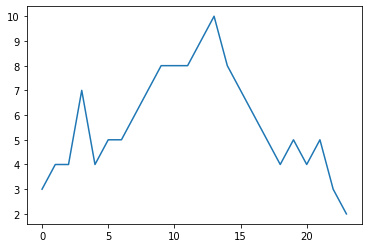

In [200]:
# see how the number of persons varies eventually with time
f = pd.to_numeric(df['Nb personne'])
plt.figure()
plt.plot(f)

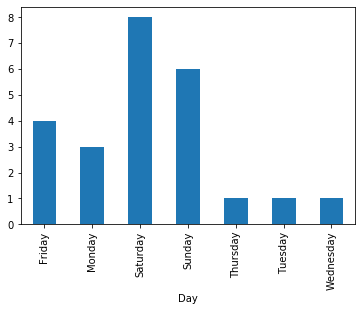

In [201]:
# show the distribution of reservations over the days of the week
plt.figure()
df.groupby('Day')['Day'].count().plot.bar()
plt.show()

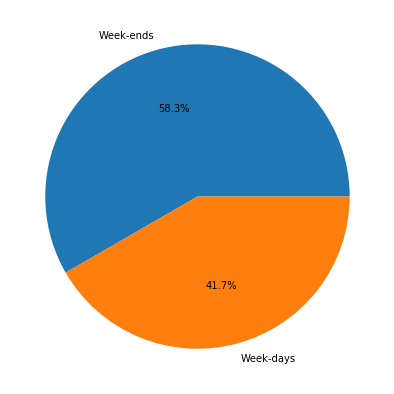

In [202]:
# weekends vs weekdays
week_count = df.groupby('Day')['Day'].count()
we_wd = {'weekends': week_count['Saturday']+week_count['Sunday'] , 'weekdays': week_count.values.sum()-(week_count['Saturday']+week_count['Sunday']) }
we_wd = pd.Series(we_wd)

categories = ['Week-ends', 'Week-days']
fig = plt.figure(figsize =(10, 7))
plt.pie(we_wd, labels = categories, autopct='%1.1f%%')
plt.show()